In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

In [2]:
def generate_signal(freq, fourier=False, base=False, sinusoidal_freq=20):
  N = 64
  T = 1/freq

  if (base):
    return N, T

  k = np.arange(0, N)
  f = np.sin(2*np.pi*sinusoidal_freq*k*T)
  if (fourier):
    F = np.fft.fft(f)
    return k, f, F

  return k, f

In [3]:
def generate_signal_sum(frequencies=[15, 40]):
  t = np.linspace(0, 1, 100)
  x = np.sin(2*np.pi*frequencies[0]*t) + np.sin(2*np.pi*frequencies[1]*t)
  y = np.fft.fft(x)                        # DFT
  m = np.abs(y)                            # Magnitude
  p = np.unwrap(np.angle(y))               # Phase

  return y, m, p

In [4]:
def generate_impulse(w, ffts=False, base=False):
  A = 0.75
  Ts = 0.01
  T = 100
  t = np.arange(0, T+Ts, Ts)
  x = A * np.where(np.abs(t) <= w/2, 1, 0)
  if base:
    return t, x

  df = 1 / T
  Fmax = 1 / Ts
  if not ffts:
    f = np.arange(0, Fmax+df, df)
    y = np.fft.fft(x)
  else:
    f = np.arange(-Fmax/2, Fmax/2+df, df)
    y = np.fft.fftshift(np.fft.fft(x))

  return f, y

In [5]:
def generate_white_noise():
  Ts = 0.01
  T = 50
  t = np.arange(0, T+Ts, Ts)
  x1 = np.random.rand(len(t))

  return t, x1, Ts

In [6]:
def filter_noise(x, Ts):
  om0 = 2 * np.pi
  dz = 0.005
  A = 1
  oms = om0 * Ts
  a = [1 + 2 * dz * oms + oms ** 2, -2 * (1 + dz * oms), 1]
  b = [A * 2 * oms ** 2]
  y = lfilter(b, a, x)

  return y

In [7]:
def generate_white_noise_fft(x):
  Ts = 0.01
  T = 50
  df = 1 / T
  Fmax = 1 / Ts
  f = np.arange(-Fmax/2, Fmax/2+df, df)
  Fu1 = np.fft.fft(x)
  Fu1p = np.fft.fftshift(Fu1)
  m = np.abs(Fu1p)

  return f, m


In [8]:
def plot_graph(x, y, xl='X', yl='Y', title='Original Signal', legend='', show=True, subplot='', stem=False):
  if (subplot != ''):
    plt.subplot(subplot[0], subplot[1], subplot[2])

  if not stem:
    plt.plot(x, y, label=legend)
  else:
    plt.stem(x, y, label=legend)

  plt.grid(True)
  plt.xlabel(xl)
  plt.ylabel(yl)
  plt.title(title)
  plt.tight_layout()

  if legend != '':
    plt.legend()
  if show:
    plt.show()

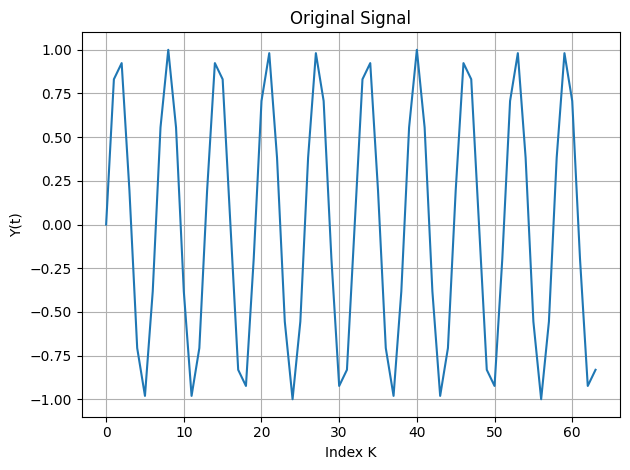

In [9]:
# Part 1
k, f, F = generate_signal(128, fourier=True)
plot_graph(k, f, xl='Index K', yl='Y(t)')

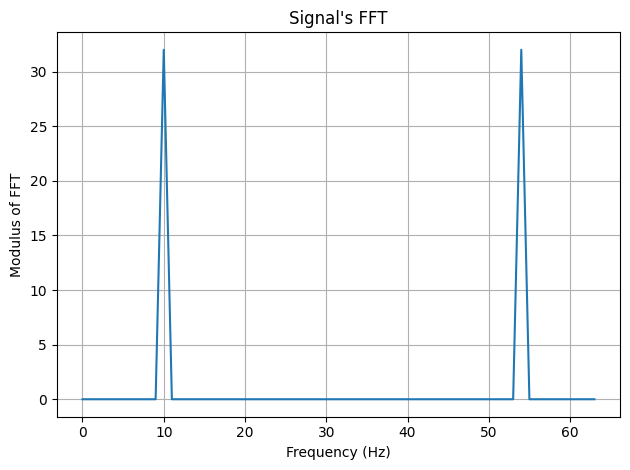

In [10]:
plot_graph(k, np.abs(F), xl='Frequency (Hz)', yl='Modulus of FFT', title='Signal\'s FFT')

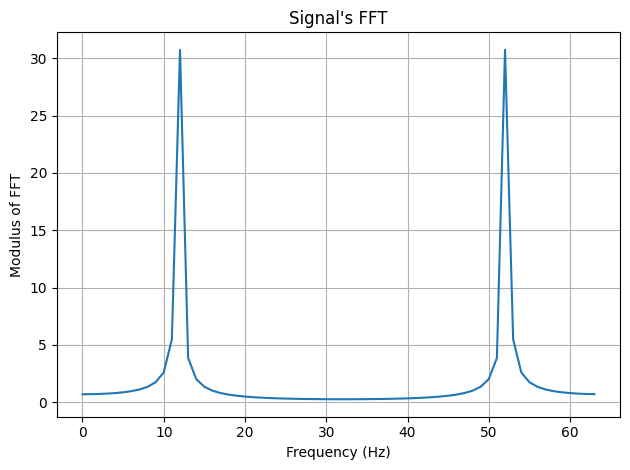

In [11]:
k, f, F = generate_signal(108, fourier=True)
plot_graph(k, np.abs(F), xl='Frequency (Hz)', yl='Modulus of FFT', title='Signal\'s FFT')

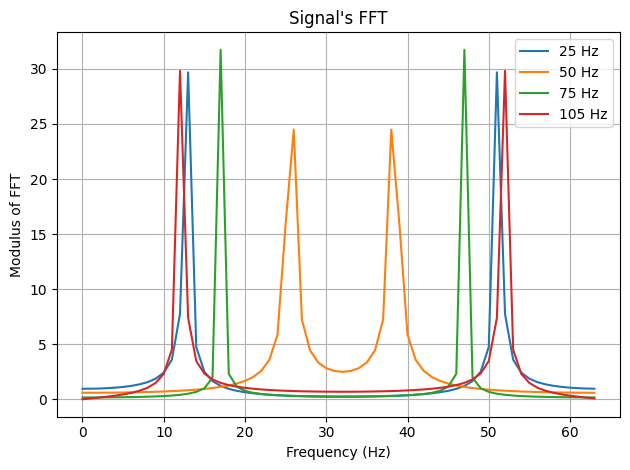

In [12]:
k, f, F = generate_signal(25, fourier=True)
plot_graph(k, np.abs(F), xl='Frequency (Hz)', yl='Modulus of FFT', title='Signal\'s FFT', legend="25 Hz", show=False)

k, f, F = generate_signal(50, fourier=True)
plot_graph(k, np.abs(F), xl='Frequency (Hz)', yl='Modulus of FFT', title='Signal\'s FFT', legend="50 Hz", show=False)

k, f, F = generate_signal(75, fourier=True)
plot_graph(k, np.abs(F), xl='Frequency (Hz)', yl='Modulus of FFT', title='Signal\'s FFT', legend="75 Hz", show=False)

k, f, F = generate_signal(105, fourier=True)
plot_graph(k, np.abs(F), xl='Frequency (Hz)', yl='Modulus of FFT', title='Signal\'s FFT', legend="105 Hz", show=True)

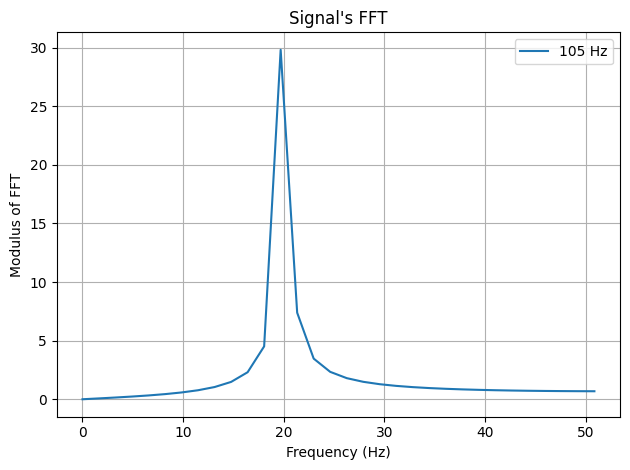

In [13]:
N, T = generate_signal(105, base=True)
k, f, F = generate_signal(105, fourier=True)
hertz = k * 1 / (N * T)
half_array = round(N/2)
plot_graph(hertz[:half_array], np.abs(F)[:half_array], xl='Frequency (Hz)', yl='Modulus of FFT', title='Signal\'s FFT', legend="105 Hz", show=True)

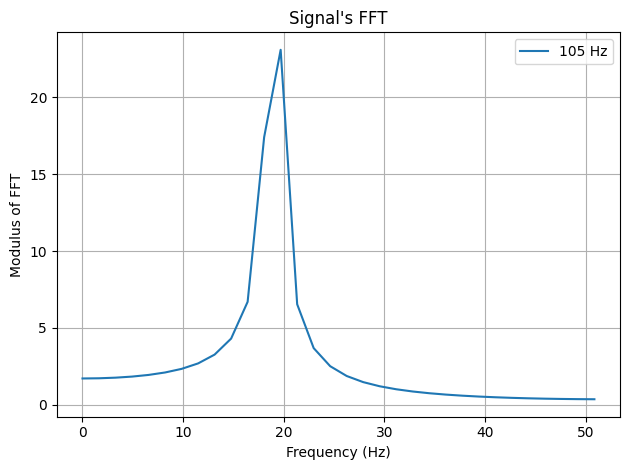

In [14]:
N, T = generate_signal(105, base=True)
k, f, F = generate_signal(105, fourier=True, sinusoidal_freq=19)
hertz = k * 1 / (N * T)
half_array = round(N/2)
plot_graph(hertz[:half_array], np.abs(F)[:half_array], xl='Frequency (Hz)', yl='Modulus of FFT', title='Signal\'s FFT', legend="105 Hz", show=True)

In [15]:
# Part 2
y, m, p = generate_signal_sum()
f = np.arange(len(y)) * 99 / len(y)      # Frequency vector

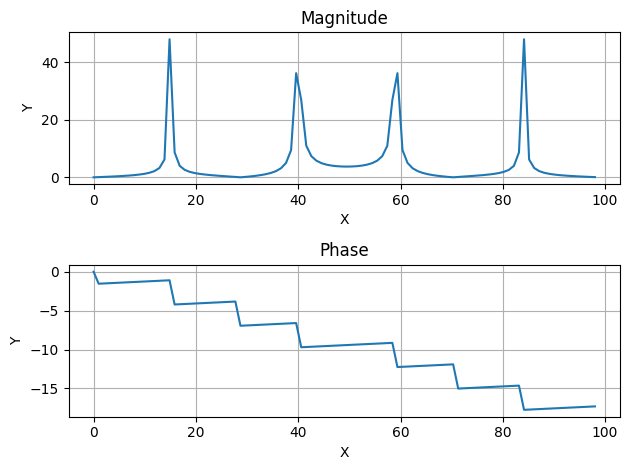

In [16]:
plot_graph(f, m, title='Magnitude', subplot=(2,1,1), show=False)
plot_graph(f, p, title='Phase', subplot=(2,1,2))

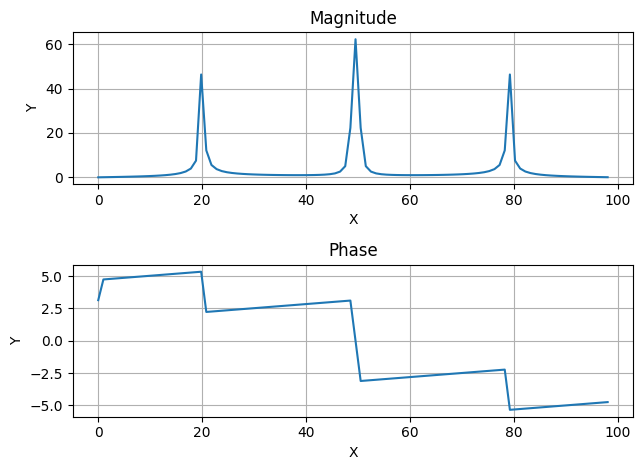

In [17]:
y, m, p = generate_signal_sum(frequencies=[20, 50])
f = np.arange(len(y)) * 99 / len(y)
plot_graph(f, m, title='Magnitude', subplot=(2,1,1), show=False)
plot_graph(f, p, title='Phase', subplot=(2,1,2))

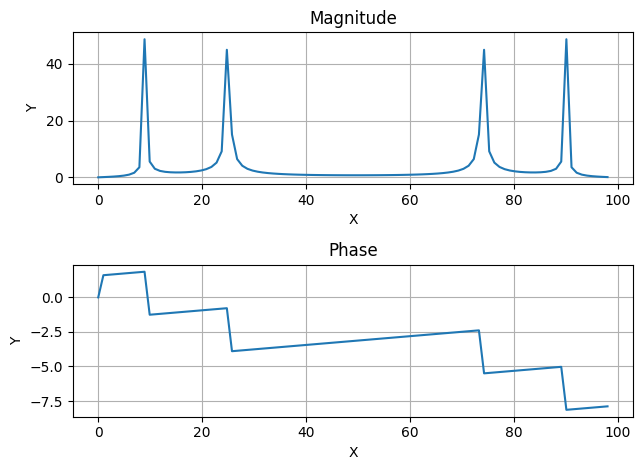

In [18]:
y, m, p = generate_signal_sum(frequencies=[25, 90])
f = np.arange(len(y)) * 99 / len(y)
plot_graph(f, m, title='Magnitude', subplot=(2,1,1), show=False)
plot_graph(f, p, title='Phase', subplot=(2,1,2))

In [19]:
# Part 3
w = [50, 5, 0.5]

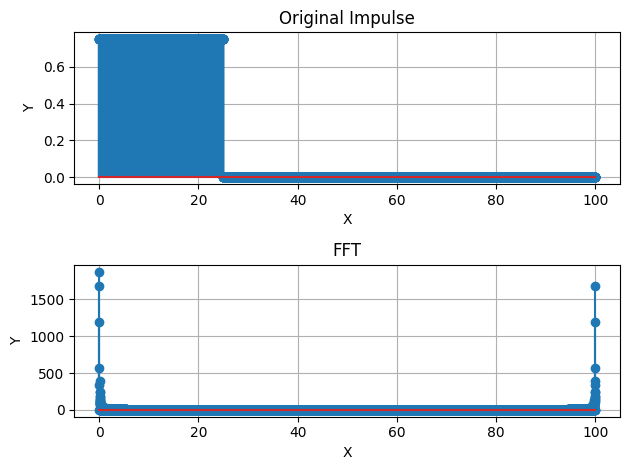

In [20]:
t, x = generate_impulse(w[0], base=True)
plot_graph(t, x, stem=True, subplot=(2,1,1), title="Original Impulse", show=False)
f, y = generate_impulse(w[0])
plot_graph(f, abs(y), subplot=(2,1,2), title="FFT", stem=True)

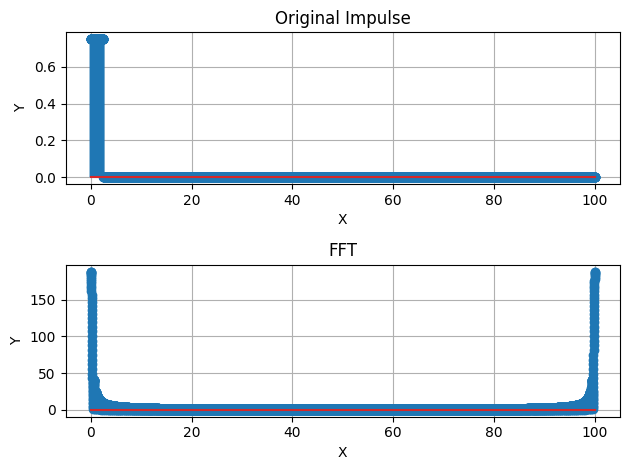

In [21]:
t, x = generate_impulse(w[1], base=True)
plot_graph(t, x, stem=True, subplot=(2,1,1), title="Original Impulse", show=False)
f, y = generate_impulse(w[1])
plot_graph(f, abs(y), subplot=(2,1,2), title="FFT", stem=True)

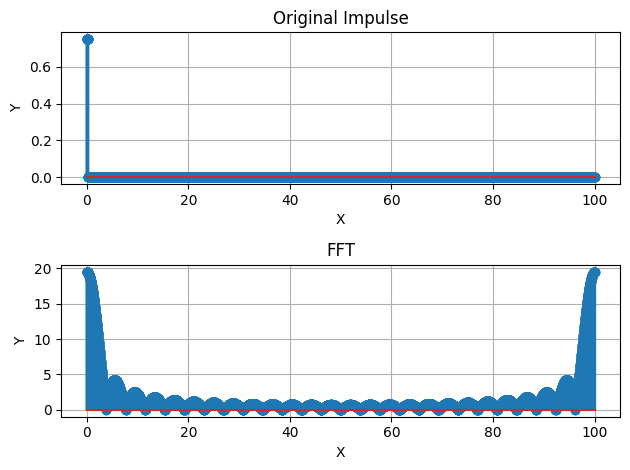

In [22]:
t, x = generate_impulse(w[2], base=True)
plot_graph(t, x, stem=True, subplot=(2,1,1), title="Original Impulse", show=False)
f, y = generate_impulse(w[2])
plot_graph(f, abs(y), subplot=(2,1,2), title="FFT", stem=True)

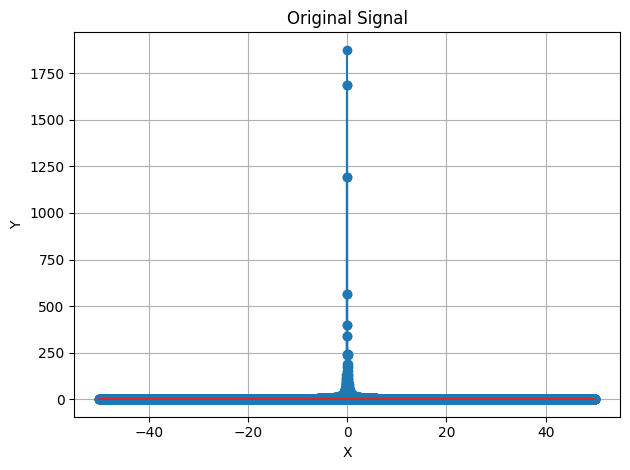

In [23]:
f, y = generate_impulse(w[0], ffts=True)
plot_graph(f, abs(y), stem=True)

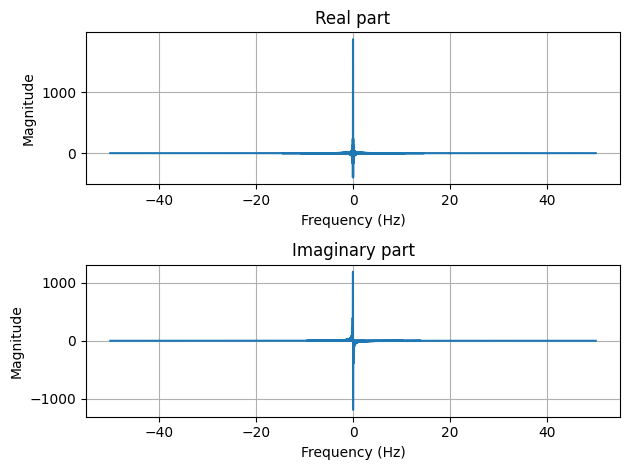

In [24]:
plot_graph(f, np.real(y), xl='Frequency (Hz)', yl='Magnitude', title='Real part', subplot=(2,1,1), show=False)
plot_graph(f, np.imag(y), xl='Frequency (Hz)', yl='Magnitude', title='Imaginary part', subplot=(2,1,2))

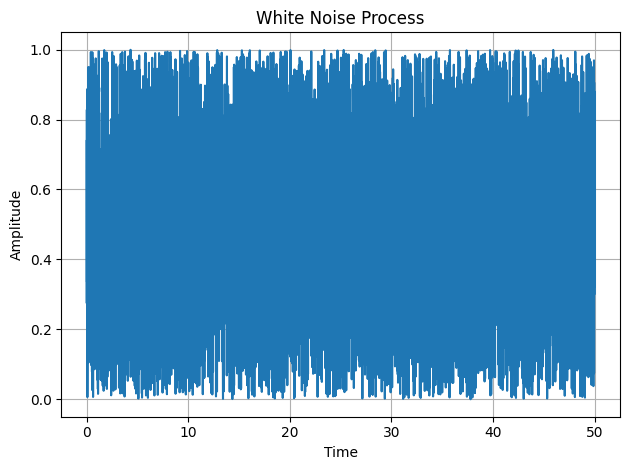

In [25]:
# Part 4
t, x, Ts = generate_white_noise()
plot_graph(t, x, xl='Time', yl='Amplitude', title='White Noise Process')

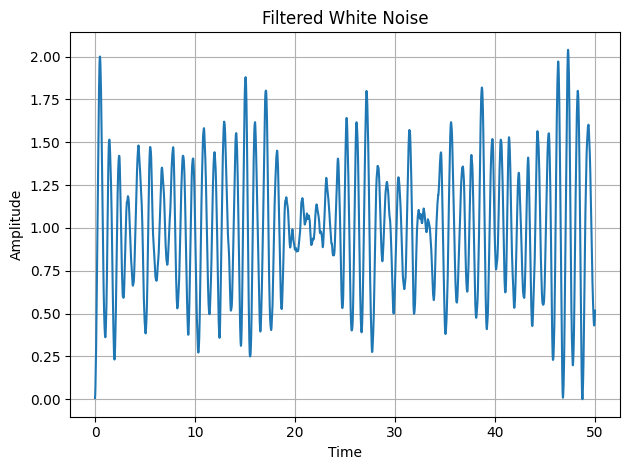

In [26]:
y = filter_noise(x, Ts)
plot_graph(t, y, xl='Time', yl='Amplitude', title='Filtered White Noise')

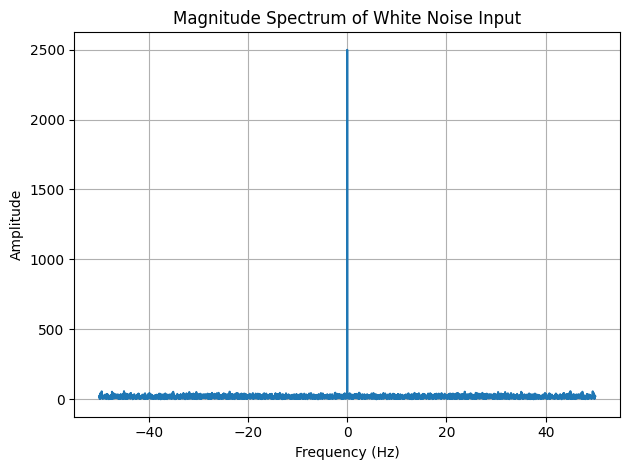

In [27]:
f, m1 = generate_white_noise_fft(x)
plot_graph(f, m1, xl='Frequency (Hz)', yl='Amplitude', title='Magnitude Spectrum of White Noise Input')

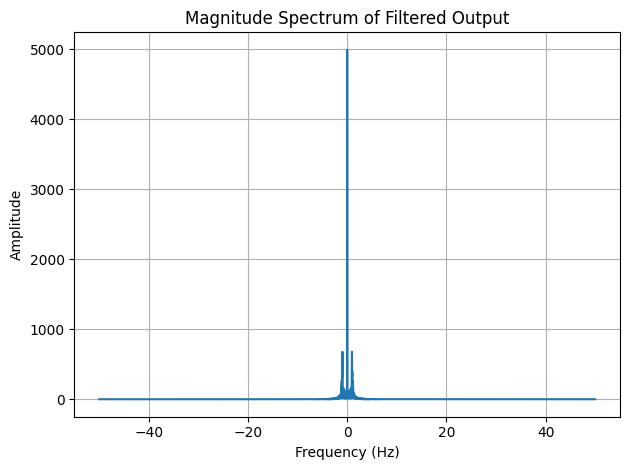

In [28]:
f, m2 = generate_white_noise_fft(y)
plot_graph(f, m2, xl='Frequency (Hz)', yl='Amplitude', title='Magnitude Spectrum of Filtered Output')